# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [36]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 655


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [37]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city + "&appid=" + weather_api_key + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | fort nelson
Processing Record 2 of Set 1 | fort frances
Processing Record 3 of Set 1 | bambanglipuro
Processing Record 4 of Set 1 | baykit
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | mahebourg
Processing Record 7 of Set 1 | hilo
Processing Record 8 of Set 1 | leningradskiy
Processing Record 9 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 10 of Set 1 | pimentel
Processing Record 11 of Set 1 | barrow
Processing Record 12 of Set 1 | kutum
Processing Record 13 of Set 1 | acarau
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | oktyabrskoye
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | bilma
Processing Record 18 of Set 1 | bathsheba
Processing Record 19 of Set 1 | mogadishu
Processing Record 20 of Set 1 | saint george
Processing Record 21 of Set 1 | wichita falls
Processing Record 22 of Set 1 | luderitz
P

Processing Record 38 of Set 4 | chebsara
Processing Record 39 of Set 4 | sungaipenuh
Processing Record 40 of Set 4 | mrirt
City not found. Skipping...
Processing Record 41 of Set 4 | grand gaube
Processing Record 42 of Set 4 | mackay
Processing Record 43 of Set 4 | pemangkat
Processing Record 44 of Set 4 | nome
Processing Record 45 of Set 4 | ville-marie
Processing Record 46 of Set 4 | hohhot
Processing Record 47 of Set 4 | klaksvik
Processing Record 48 of Set 4 | karaul
City not found. Skipping...
Processing Record 49 of Set 4 | puerto el triunfo
Processing Record 0 of Set 5 | talas
Processing Record 1 of Set 5 | saint-philippe
Processing Record 2 of Set 5 | zhuhai
Processing Record 3 of Set 5 | pimenteiras
Processing Record 4 of Set 5 | sao filipe
Processing Record 5 of Set 5 | spanish fork
Processing Record 6 of Set 5 | mtsamboro
Processing Record 7 of Set 5 | isabela
Processing Record 8 of Set 5 | johnstown
Processing Record 9 of Set 5 | dzhusaly
City not found. Skipping...
Process

Processing Record 26 of Set 8 | yerbogachen
Processing Record 27 of Set 8 | katangli
Processing Record 28 of Set 8 | paita
Processing Record 29 of Set 8 | aviemore
Processing Record 30 of Set 8 | tocantinopolis
City not found. Skipping...
Processing Record 31 of Set 8 | constitucion
Processing Record 32 of Set 8 | robertson
Processing Record 33 of Set 8 | shenjiamen
Processing Record 34 of Set 8 | jinchengjiang
City not found. Skipping...
Processing Record 35 of Set 8 | jieshi
Processing Record 36 of Set 8 | safaga
Processing Record 37 of Set 8 | husavik
Processing Record 38 of Set 8 | cortes
Processing Record 39 of Set 8 | washougal
Processing Record 40 of Set 8 | trairi
Processing Record 41 of Set 8 | caucaia
Processing Record 42 of Set 8 | guhagar
Processing Record 43 of Set 8 | pueblo nuevo
Processing Record 44 of Set 8 | muroto
Processing Record 45 of Set 8 | kuito
Processing Record 46 of Set 8 | bairiki
Processing Record 47 of Set 8 | lazaro cardenas
Processing Record 48 of Set 8

Processing Record 19 of Set 12 | paradwip
City not found. Skipping...
Processing Record 20 of Set 12 | beringovskiy
Processing Record 21 of Set 12 | tiburon
Processing Record 22 of Set 12 | peniche
Processing Record 23 of Set 12 | qui nhon
Processing Record 24 of Set 12 | obo
Processing Record 25 of Set 12 | suntar
Processing Record 26 of Set 12 | otane
Processing Record 27 of Set 12 | galveston
Processing Record 28 of Set 12 | gardan diwal
City not found. Skipping...
Processing Record 29 of Set 12 | susurluk
Processing Record 30 of Set 12 | malanje
Processing Record 31 of Set 12 | iskar
Processing Record 32 of Set 12 | ambodifototra
City not found. Skipping...
Processing Record 33 of Set 12 | khasan
Processing Record 34 of Set 12 | tlyarota
City not found. Skipping...
Processing Record 35 of Set 12 | dengzhou
Processing Record 36 of Set 12 | acari
Processing Record 37 of Set 12 | baragua
Processing Record 38 of Set 12 | karlshamn
Processing Record 39 of Set 12 | owando
Processing Reco

In [38]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          604
Lat           604
Lng           604
Max Temp      604
Humidity      604
Cloudiness    604
Wind Speed    604
Country       604
Date          604
dtype: int64

In [39]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,fort nelson,58.8053,-122.7002,-5.23,85,100,2.57,CA,1680326241
1,fort frances,48.5999,-93.4003,-3.24,43,0,4.12,CA,1680325979
2,bambanglipuro,-7.9500,110.2833,29.21,69,93,4.40,ID,1680326241
3,baykit,61.6700,96.3700,-9.63,75,54,1.49,RU,1680326241
4,ushuaia,-54.8000,-68.3000,7.81,61,75,2.06,AR,1680326242


In [40]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [41]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fort nelson,58.8053,-122.7002,-5.23,85,100,2.57,CA,1680326241
1,fort frances,48.5999,-93.4003,-3.24,43,0,4.12,CA,1680325979
2,bambanglipuro,-7.9500,110.2833,29.21,69,93,4.40,ID,1680326241
3,baykit,61.6700,96.3700,-9.63,75,54,1.49,RU,1680326241
4,ushuaia,-54.8000,-68.3000,7.81,61,75,2.06,AR,1680326242


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

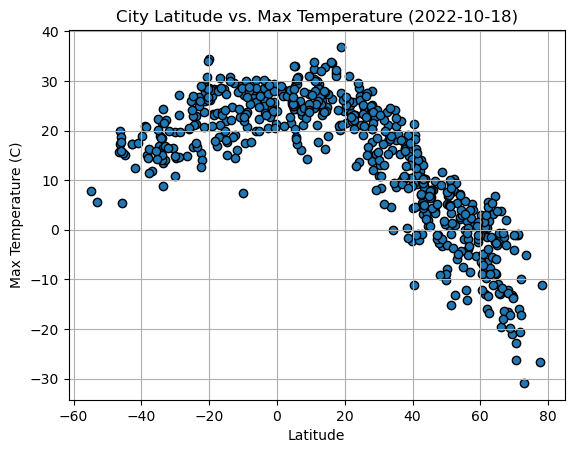

In [42]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    x=city_data_df['Lat'], 
    y=city_data_df['Max Temp'],
    marker='o',
    edgecolors='k'
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

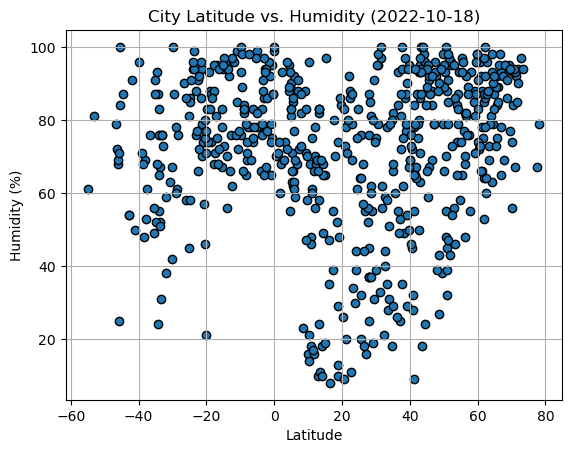

In [43]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    x=city_data_df['Lat'], 
    y=city_data_df['Humidity'],
    marker='o',
    edgecolors='k'
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

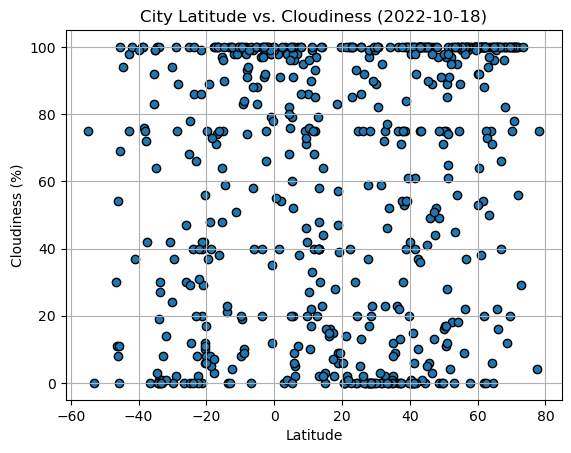

In [44]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    x=city_data_df['Lat'], 
    y=city_data_df['Cloudiness'],
    marker='o',
    edgecolors='k'
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

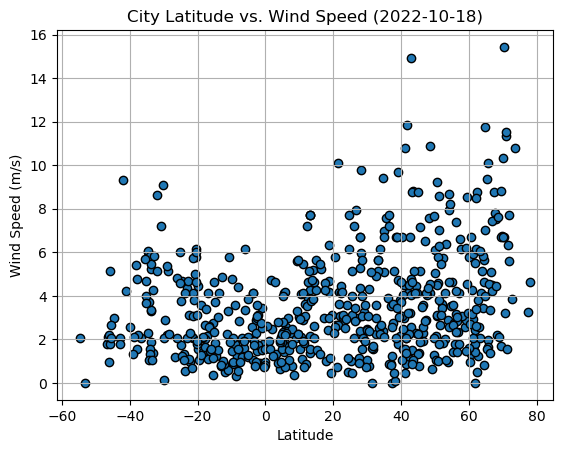

In [45]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    x=city_data_df['Lat'], 
    y=city_data_df['Wind Speed'],
    marker='o',
    edgecolors='k'
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [74]:
# Define a function to create Linear Regression plots
def linear_regression_plot(df,x,y,xlabel,ann_x,ann_y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(df[x], df[y])
    regress_values = df[x] * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(df[x], df[y])
    plt.xlabel(xlabel)
    plt.ylabel(y)
    plt.annotate(line_eq,(1*ann_x,1*ann_y), fontsize=15,color="red")
    plt.plot(df[x], regress_values,"r-")
    print("The r-value is: "+str(rvalue))
    
    plt.show()

In [47]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fort nelson,58.8053,-122.7002,-5.23,85,100,2.57,CA,1680326241
1,fort frances,48.5999,-93.4003,-3.24,43,0,4.12,CA,1680325979
3,baykit,61.6700,96.3700,-9.63,75,54,1.49,RU,1680326241
6,hilo,19.7297,-155.0900,23.85,84,100,3.13,US,1680325959
7,leningradskiy,69.3833,178.4167,-13.07,95,100,1.71,RU,1680326242


In [48]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,bambanglipuro,-7.9500,110.2833,29.21,69,93,4.40,ID,1680326241
4,ushuaia,-54.8000,-68.3000,7.81,61,75,2.06,AR,1680326242
5,mahebourg,-20.4081,57.7000,28.47,75,10,6.16,MU,1680326242
8,pimentel,-6.8367,-79.9342,27.16,78,0,2.06,PE,1680326242
11,acarau,-2.8856,-40.1200,24.26,86,98,2.90,BR,1680326242


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8906484603976004


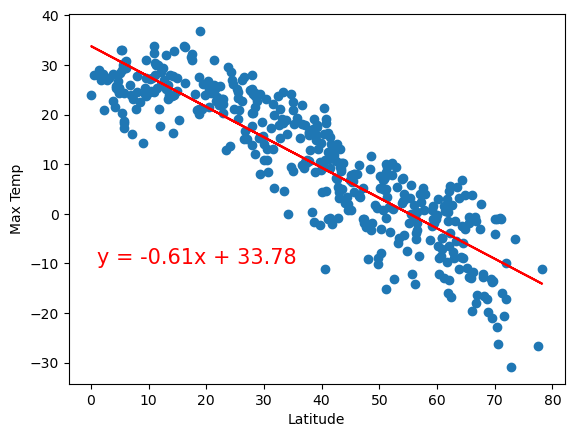

In [82]:
# Linear regression on Northern Hemisphere
linear_regression_plot(northern_hemi_df,'Lat','Max Temp','Latitude',1,-10)

The r-value is: 0.5899643630227344


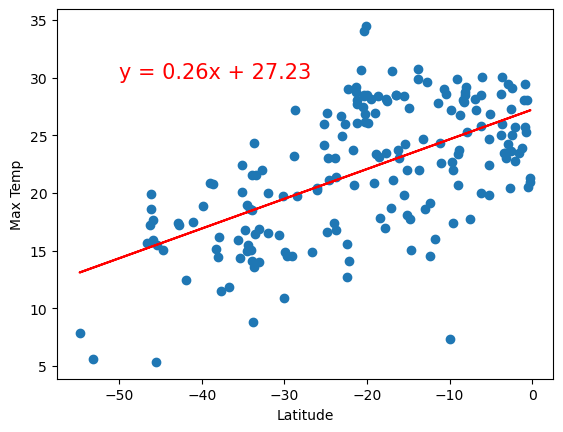

In [81]:
# Linear regression on Southern Hemisphere
linear_regression_plot(southern_hemi_df,'Lat','Max Temp','Latitude',-50,30)

**Discussion about the linear relationship:** The northern hemisphere plot shows that there is a strong negative correlation. This means that as latitude increases, the max temperature decreases. The southern hemisphere plot shows a moderate negative correlation. As latitude increases, temperature increases - however, it is not as storng as the northern hemisphere's correlation.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.32820167553561375


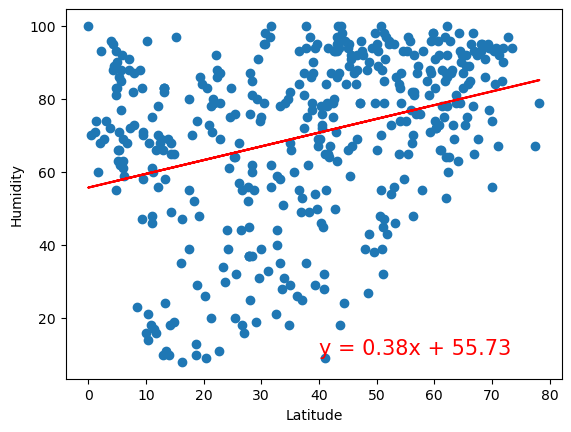

In [83]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df,'Lat','Humidity','Latitude',40,10)

The r-value is: 0.35325110350524713


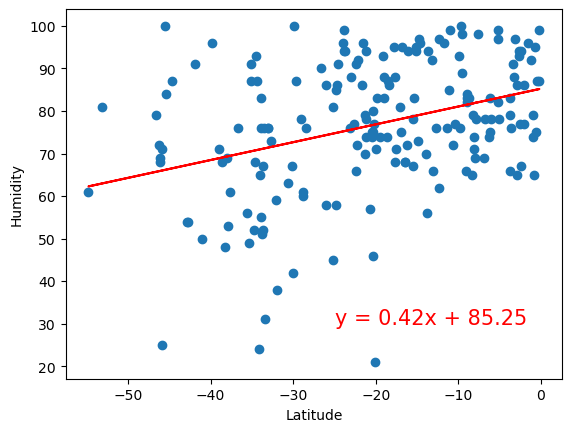

In [86]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df,'Lat','Humidity','Latitude',-25,30)

**Discussion about the linear relationship:** Both hemisphere's r value is indicating there's a weak positive correlation between latitude and humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.24286532908599465


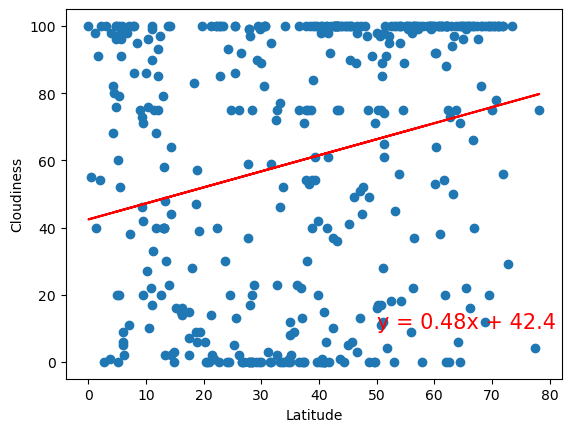

In [88]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df,'Lat','Cloudiness','Latitude',50,10)

The r-value is: 0.3195862757154545


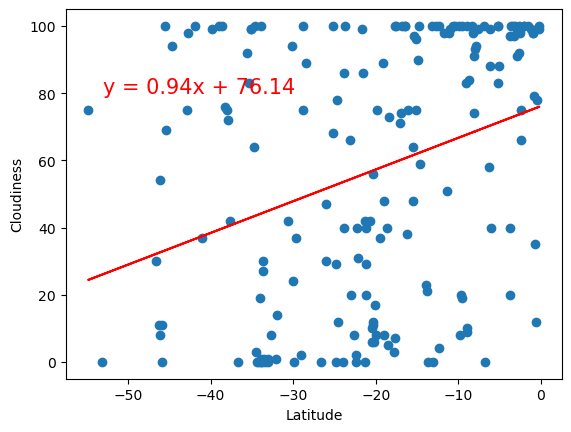

In [90]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df,'Lat','Cloudiness','Latitude',-53,80)

**Discussion about the linear relationship:** The northern hemisphere r-value is showing that the positive correlation between latitude and cloudiness is very weak or none exists. As one observes the graph, values appear to be scattered across the graph unlike the correlation between to northern hemisphere's latitude vs max temp graph. The southern hemisphere r-value is showing a weak positive correlationship between latitude and cloudiness. Similar to the northern hemisphere results, there does not seem to be a strong relationship between cloudiness and latitude points.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.274421391881411


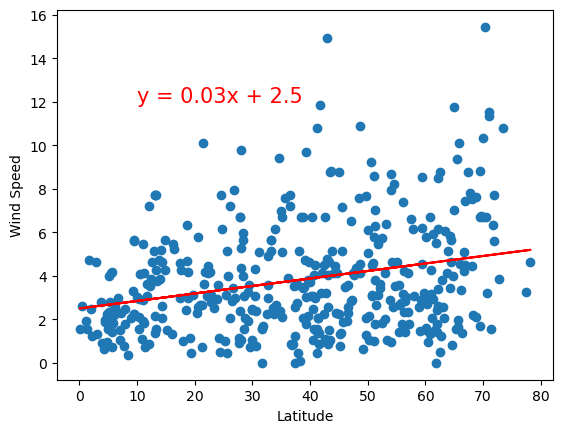

In [91]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df,'Lat','Wind Speed','Latitude',10,12)

The r-value is: -0.24016290921338246


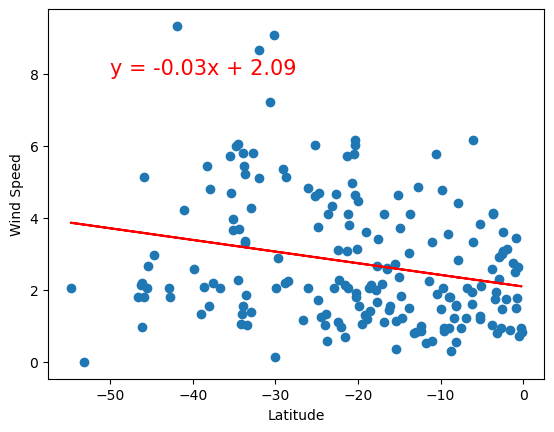

In [93]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df,'Lat','Wind Speed','Latitude',-50,8)

**Discussion about the linear relationship:** The northern hemisphere r-value is showing that there is a very weak or non-existent correlation between latitude and wind speed. Similarly, the southern hemisphere r-value is showing that there is a very weak negative correlation between latitude and wind speed. Both r-values indicate a very weak or non-existent correlation.